### 1. Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### 2. Business Understanding

1. You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

1. The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. **The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.**

1. In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

1. When a person applies for a loan, there are two types of decisions that could be taken by the company:
    1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
        1. **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
        1. **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
        1. **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
    1. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

 
### 3. Business Objectives

1. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

1. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

1. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. **Identification of such applicants using EDA is the aim of this case study.**

1. In other words, the company wants to understand **the driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

1. To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 
### 4. Results Expected
1. Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
1. Present the overall approach of the analysis in a presentation: 
    1. Mention the problem statement and the analysis approach briefly 
    1. Explain the results of univariate, bivariate analysis etc. in business terms
    1. Include visualisations and summarise the most important results in the presentation

### 5. Importing libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import sklearn


### 6. Reading dataset

In [68]:
# Load the Dataset CSV file
lendingCaseStudyDataFrame = pd.read_csv('loan.csv')

# Load the metadata file
lendingCaseStudyMetadata = pd.read_excel('Data_Dictionary.xlsx', sheet_name='LoanStats')

/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_18879/1161814571.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lendingCaseStudyDataFrame = pd.read_csv('loan.csv')


### 7. DATA CLEANING ACTIONS


#### 7.1 FIXING ROWS AND COLUMNS


##### 7.1.1 Fixing columns
1. Some of the columns are unncessary as it does not impact the results i.e. loan descisions. It doesn't provide any variability or meaningful information that could contribute to analysis. Keeping such columns could introduce noise or redundancy, so dropping them makes your dataset cleaner and more efficient to work with.
1. Some of the columns have mixed types as described by the error when read by pandas.



In [69]:
# Listing types and unique values of each column
pd.reset_option('display.max_seq_items')
print("Columns and column types in the CSV file:")
for columnName in lendingCaseStudyDataFrame.columns:
    columnType = lendingCaseStudyDataFrame[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrame[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Columns and column types in the CSV file:
The data type of id is: [<class 'int'>]
The number of unique values of id is: 39717


The data type of member_id is: [<class 'int'>]
The number of unique values of member_id is: 39717


The data type of loan_amnt is: [<class 'int'>]
The number of unique values of loan_amnt is: 885


The data type of funded_amnt is: [<class 'int'>]
The number of unique values of funded_amnt is: 1041


The data type of funded_amnt_inv is: [<class 'float'>]
The number of unique values of funded_amnt_inv is: 8205


The data type of term is: [<class 'str'>]
The number of unique values of term is: 2
The unique values of term is: [' 36 months' ' 60 months']


The data type of int_rate is: [<class 'str'>]
The number of unique values of int_rate is: 371


The data type of installment is: [<class 'float'>]
The number of unique values of installment is: 15383


The data type of grade is: [<class 'str'>]
The number of unique values of grade is: 7
The unique values of grade

In [70]:
# Dropping 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m',
# 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
# 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
# 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
# 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
# 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
# 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
# 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'tot_cur_bal'
# as all values are 'nan'
columnsListWithAllValuesNan = ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m',
'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'tot_cur_bal']

# Dropping 'policy_code' column as all values are 1.
# Dropping 'application_type' column as all values are individual
# Dropping 'acc_now_delinq', 'delinq_amnt', column as all values are 0
# Dropping 'pymnt_plan' column as all values are 'n'.
# Dropping 'initial_list_status' as all values are 'f'.
columnsListWithAllSameValues = ['policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'initial_list_status']

# Dropping 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens' as all values are either 'nan or 0'
columnsListWithEitherNanOrOs = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'delinq_amnt']

# Dropping irrelvant columns not useful for analysis
columnsWithNoRelevancyForResults = ['url']

lendingCaseStudyDataFrameCleaned = lendingCaseStudyDataFrame.drop(columns=columnsListWithAllValuesNan + columnsListWithAllSameValues + columnsListWithEitherNanOrOs
                                                                 + columnsWithNoRelevancyForResults)

lendingCaseStudyDataFrameCleaned.head()




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [71]:
# Printing the List all column names individually and its type again after removal of non-important and empty columns.
print("Info and types of datasets after dropping unncessary columns: ")
print(lendingCaseStudyDataFrameCleaned.info())
print("\n")
print("Columns and column types in the Cleaned CSV file:")
for columnName in lendingCaseStudyDataFrameCleaned.columns:
    columnType = lendingCaseStudyDataFrameCleaned[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrameCleaned[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Info and types of datasets after dropping unncessary columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc   

In [72]:
# Fixing data types of each column.

from datetime import datetime
from enum import Enum
import math

class HomeOwnership(Enum):
    RENT = "RENT"
    OWN = "OWN"
    MORTGAGE = "MORTGAGE"
    NONE = "NONE"
    OTHER = "OTHER"

class VerificationStatus(Enum):
    VERIFIED = "Verified"
    SOURCE_VERIFIED = "Source Verified"
    NOT_VERIFIED = "Not Verified"
    
class LoanStatus(Enum):
    CURRENT = "Current"
    FULLY_PAID = 'Fully Paid'
    CHARGED_OFF = 'Charged Off'

# Define conversion functions
def toString(value):
    return str(value)

def toFloat(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return the None.
    elif isinstance(value, str) or isinstance(value, int) or isinstance(value, float):
        return float(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

def toInt(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str) or isinstance(value, int) or isinstance(value, float):
        return int(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

    
def termToInt(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str):
        value = value.rstrip(' months')
        return int(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

def interestToFloat(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str):
        value = value.strip()  # Remove any leading/trailing spaces
        if value.endswith('%'):
            value = value.rstrip('%')
        try:
            return float(value) / 100.0
        except ValueError:
            raise ValueError(f"Cannot convert '{value}' to a float.")
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

def toVerificationStatus(verificationStatusStr: str) -> VerificationStatus:
    for status in VerificationStatus:
        if status.value == verificationStatusStr:
            return status
    raise ValueError(f"'{verificationStatusStr}' is not a valid VerificationStatus")

def toDatetimeParsingMonthYear(dateTimeStr) -> datetime:
    if dateTimeStr is None or (isinstance(dateTimeStr, float) and math.isnan(dateTimeStr)):
        return None  # return None.
    if not isinstance(dateTimeStr, str):
        raise TypeError(f"Expected a string for dateTimeStr, but got {type(dateTimeStr).__name__}")
    try:
        return datetime.strptime(dateTimeStr, "%b-%y")
    except ValueError as e:
        raise ValueError(f"Error parsing date string '{dateTimeStr}': {e}")

def toHomeOwnership(homeOwnershipStr: str) -> HomeOwnership:
    for ownership in HomeOwnership:
        if ownership.value == homeOwnershipStr:
            return ownership
    raise ValueError(f"'{homeOwnershipStr}' is not a valid HomeOwnership")


def toLoanStatus(loanStatusStr: str) -> LoanStatus:
    for status in LoanStatus:
        if status.value == loanStatusStr:
            return status
    raise ValueError(f"'{loanStatusStr}' is not a valid LoanStatus")

# Define a conversion map (like a case switch)
conversionMap = {
    'id': toString,    # Convert 'id' column to string
    'member_id': toString, # Convert 'member_id' column to string
    'loan_amnt': toFloat, # Convert 'loan_amnt' column to float.
    'funded_amnt': toFloat,  # Convert 'funded_amnt' column to float.
    'funded_amnt_inv' : toFloat, # Convert 'funded_amnt_inv' column to float.
    'term' : termToInt, # Convert 'term' column to int to enable calculations.
    'int_rate' : interestToFloat, # Convert 'int_rate' column to float to enable calculations.
    'installment' : toFloat, # Convert 'installment' column to float to enable calculations though it already is.
    'grade' : toString, # Convert 'grade' column to string though it already is.
    'sub_grade' : toString, # Convert 'sub_grade' column to string though it already is.
    'emp_title' : toString, # Convert 'emp_title' column to string though it already is.
    'emp_length' : toString, # Convert 'emp_length' column to string though it already is.
    'home_ownership': toHomeOwnership, # Convert 'home_ownership' column to HomeOwnership enum. 
    'annual_inc' : toFloat, # Convert 'annual_inc' column to float to enable calculations though it already is.
    'verification_status' : toVerificationStatus, # Convert 'verification_status' column to VerificationStatus enum. 
    'issue_d' : toDatetimeParsingMonthYear, # Convert 'issue_d' column to DateTimeStamp type.
    'loan_status' : toLoanStatus, # Convert 'loan_status' column to LoanStatus enum.
    'url' : toString, # Convert 'url' column to string though it already is.
    'desc' : toString, # Convert 'desc' column to string though it already is.
    'purpose' : toString, # Convert 'purpose' column to string though it already is.
    'title' : toString, # Convert 'title' column to string.
    'zip_code' : toString, # Convert 'zip_code' column to string though it already is.
    'addr_state' : toString, # Convert 'addr_state' column to string though it already is.
    'dti' : toFloat, # Convert 'dti' column to float though it already is.
    'delinq_2yrs' : toInt, # Convert 'delinq_2yrs' column to int though it already is.
    'earliest_cr_line' : toDatetimeParsingMonthYear, # Convert 'earliest_cr_line' column to DateTimeStamp type.
    'inq_last_6mths' : toInt, # Convert 'inq_last_6mths' column to int though it already is.
    'mths_since_last_delinq' : toInt, # Convert 'mths_since_last_delinq' column to int.
    'mths_since_last_record' : toInt, # Convert 'mths_since_last_record' column to int.
    'open_acc' : toInt, # Convert 'open_acc' column to int.
    'pub_rec' : toInt, # Convert 'pub_rec' column to int.
    'revol_bal' : toFloat, # Convert 'revol_bal' column to float.
    'revol_util' : interestToFloat, # Convert 'revol_util' column to float.
    'total_acc' : toInt, # Convert 'total_acc' column to int though it already is.
    'out_prncp' : toFloat, # Convert 'out_prncp' column to float though it already is.
    'out_prncp_inv' : toFloat, # Convert 'out_prncp_inv' column to float though it already is.
    'total_pymnt' : toFloat, # Convert 'total_pymnt' column to float though it already is.
    'total_pymnt_inv' : toFloat, # Convert 'total_pymnt_inv' column to float though it already is.
    'total_rec_prncp' : toFloat, # Convert 'total_rec_prncp' column to float though it already is.
    'total_rec_int' : toFloat, # Convert 'total_rec_int' column to float though it already is.
    'total_rec_late_fee' : toFloat, # Convert 'total_rec_late_fee' column to float though it already is.
    'recoveries' : toFloat, # Convert 'recoveries' column to float though it already is.
    'collection_recovery_fee' : toFloat, # Convert 'collection_recovery_fee' column to float though it already is.
    'last_pymnt_d' : toDatetimeParsingMonthYear, # Convert 'last_pymnt_d' column to DateTimeStamp type.
    'last_pymnt_amnt' : toFloat, # Convert 'last_pymnt_amnt' column to float though it already is.
    'next_pymnt_d' : toDatetimeParsingMonthYear, # Convert 'next_pymnt_d' column to DateTimeStamp type.
    'last_credit_pull_d' : toDatetimeParsingMonthYear, # Convert 'last_credit_pull_d' column to DateTimeStamp type.
    'pub_rec_bankruptcies' : toInt, # Convert 'pub_rec_bankruptcies' column to int type.
}

lendingCaseStudyDataFrameCleanedWithTypesCorrected = pd.DataFrame()
for columnName in lendingCaseStudyDataFrameCleaned.columns:
    lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName] = lendingCaseStudyDataFrameCleaned[columnName].apply(conversionMap[columnName])

In [73]:
# Printing the List all column names individually and its type again after correcting the type of columns.

print("Info and types of datasets after correcting the types of columns: ")
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected.info())
print("\n")
print("Columns and column types in the Type corrected CSV file:")
for columnName in lendingCaseStudyDataFrameCleanedWithTypesCorrected.columns:
    columnType = lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Info and types of datasets after correcting the types of columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  object        
 1   member_id                39717 non-null  object        
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               3

In [74]:
# Fixing missing values whereever required.
lendingCaseStudyDataFrameCleanedWithTypesCorrected.isnull().sum()


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal 

In [75]:
# Imputing missing values in 'months_since_last_delinquency', 'mths_since_last_record' with a large number, based on the assumption that missing data indicates no delinquency or public record has occurred.
# This approach allows for analysis by treating the missing data as an indication that the event never happened, enabling relationships with other variables to be explored.
lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'].fillna(99999)
lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'].fillna(99999)

In [76]:
# Columns with Null Values:
# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# last_pymnt_d : Last month payment was received
# next_pymnt_d: Next scheduled payment date
# last_credit_pull_d: The most recent month LC pulled credit for this loan
# pub_rec_bankruptcies: Number of public record bankruptcies 

# Following are actions need to be taken on the dataset assuming the following:
# 1. Revolving Line Utilization Rate (revol_util): The revol_util value is null because the borrower does not have a credit card. Given that only 50 out of 39,717 records have null values, it may be reasonable to exclude these records from the analysis.

# 2. last_pymnt_d is null: The last_pymnt_d value is null because the borrower has never made a payment to LendingClub. This assumption can be validated by examining the loan status of records where last_pymnt_d is null. Therefore, it is acceptable to retain these null values in the dataset.
print('----------------last_pymnt_d: loanStaus-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['last_pymnt_d'].isnull()]['loan_status'].unique())
print()
# 3. next_pymnt_d: The next_pymnt_d value is null because the loan has been terminated, meaning the loan status is either charged off or fully paid. Therefore, it is acceptable to retain these null values in the dataset.
print('----------------next_pymnt_d: loanStaus-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['next_pymnt_d'].isnull()]['loan_status'].unique())
print()
# 4. last_credit_pull_d: The last_credit_pull_d value is null because LendingClub never pulled the borrower's credit history. Given that there are only 2 such records, it may be reasonable to remove these rows from the dataset.

# 5. pub_rec_bankruptcies is null The pub_rec_bankruptcies value is null due to the unavailability of data from government sources. Since only 697 out of 39,717 records have null values, it may be reasonable to exclude these rows from the analysis.

----------------last_pymnt_d: loanStaus-------------
[<LoanStatus.CHARGED_OFF: 'Charged Off'>]

----------------next_pymnt_d: loanStaus-------------
[<LoanStatus.FULLY_PAID: 'Fully Paid'>
 <LoanStatus.CHARGED_OFF: 'Charged Off'>]



##### 7.1.2 Fixing Rows
1. Before we fix rows, let's look at the definition of each of the column.
```
loan_amnt --> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt --> The total amount committed to that loan at that point in time.
funded_amnt_inv --> The total amount committed by investors for that loan at that point in time.
term --> The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate --> Interest Rate on the loan
installment --> The monthly payment owed by the borrower if the loan originates.
issue_d --> The month which the loan was funded
delinq_2yrs --> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the        past 2 years
earliest_cr_line --> The month the borrower's earliest reported credit line was opened
mths_since_last_delinq --> The number of months since the borrower's last delinquency.
mths_since_last_record --> The number of months since the last public record.
open_acc --> The number of open credit lines in the borrower's credit file.
pub_rec --> Number of derogatory public records
revol_bal --> Total credit revolving balance
revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc --> The total number of credit lines currently in the borrower's credit file
out_prncp	--> Remaining outstanding principal for total amount funded
out_prncp_inv	--> Remaining outstanding principal for portion of total amount funded by investors
total_pymnt --> Payments received to date for total amount funded
total_pymnt_inv --> Payments received to date for portion of total amount funded by investors
total_rec_prncp --> Principal received to date
total_rec_int	--> Interest received to date
total_rec_late_fee --> Late fees received to date
recoveries --> post charge off gross recovery (only for charged off loans)
collection_recovery_fee --> post charge off collection fee; refers to the costs incurred by a lender or creditor       when attempting to recover a debt after it has been charged off. These fees are typically paid to third-party       collection agencies, legal firms, or other entities involved in the collection process
last_pymnt_d --> Last month payment was received
next_pymnt_d --> Next scheduled payment date
last_pymnt_amnt --> Last total payment amount received
revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
last_credit_pull_d --> The most recent month LC pulled credit for this loan
pub_rec_bankruptcies --> Number of public record bankruptcies 
```
2. Removal of rows as described above:
   1. Revolving Line Utilization Rate (revol_util): The revol_util value is null because the borrower does not have a credit card. Given that only 50 out of 39,717 records have null values, it may be reasonable to exclude these records from the analysis.
   2. last_credit_pull_d: The last_credit_pull_d value is null because LendingClub never pulled the borrower's credit history. Given that there are only 2 such records, it may be reasonable to remove these rows from the dataset.
   3. pub_rec_bankruptcies is null The pub_rec_bankruptcies value is null due to the unavailability of data from government sources. Since only 697 out of 39,717 records have null values, it may be reasonable to exclude these rows from the analysis.
2. Ensure that basic validations amongst different columns hold true for all rows. This includes following:
   1. Loan Amount Consistency: loan_amnt > funded_amnt and  loan_amnt > funded_amnt_inv
   2. Validate the term is either 36 or 60 months
   3. Validate that last_payment_date < next_payment_date
   4. Validate that earliest_cr_line <= issue_d
   5. Validate that open_acc <= total_acc
   6. Validate that total_rec_pricpal <= loan_amnt
   7. Validate that installment amount matches from the form
   8. Validate that pub_rec > pub_rec_bankruptcies
   9. Total Payments Consistency with interest and prinicipal:
      1. total_pymnt + total_pymnt_inv == total_rec_prncp + total_rec_int + total_rec_late_fee + recoveries
      2. total_rec_prncp = out_prncp + out_prncp_inv
   10. Loan status, HomeOwnership coolumn values are already verified via the enum types.


In [77]:
# Drop rows where the 'revol_util', 'last_credit_pull_d', and 'pub_rec_bankruptcies' column is null
lendingCaseStudyDataFrameCleanedWithTypesCorrected = lendingCaseStudyDataFrameCleanedWithTypesCorrected.dropna(subset=['revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies'])

# Display the resulting DataFrame
print(f"Number of records after dropping rows with null 'revol_util', 'last_credit_pull_d' and 'pub_rec_bankruptcies': {len(lendingCaseStudyDataFrameCleanedWithTypesCorrected)}")
print(f"Number of records with null values against each column:")
lendingCaseStudyDataFrameCleanedWithTypesCorrected.isnull().sum()


Number of records after dropping rows with null 'revol_util', 'last_credit_pull_d' and 'pub_rec_bankruptcies': 38969
Number of records with null values against each column:


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal 

In [78]:
# validations amongst different columns for all rows

# 1. Validate Loan Amount Consistency
loan_amount_inconsistency1 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'] ]
loan_amount_inconsistency2 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'] ]
print(f"1.1 Number of inconsistent rows for loan amount vs funded_amnt: {len(loan_amount_inconsistency1)}")
print(f"1.2 Number of inconsistent rows for loan amount vs funded_amnt_inv: {len(loan_amount_inconsistency2)}")
print()
# 2. Validate the term is either 36 or 60 months
term_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[(lendingCaseStudyDataFrameCleanedWithTypesCorrected['term'] != 36) & (lendingCaseStudyDataFrameCleanedWithTypesCorrected['term']!=60)]
print(f"2. Number of inconsistent rows for term_inconsistency: {len(term_inconsistency)}")
print()
# 3. Validate that last_payment_date <= next_payment_date
payment_d_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['last_pymnt_d'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['next_pymnt_d']]
print(f"3. Number of inconsistent rows for payment_d_inconsistency: {len(payment_d_inconsistency)}")
print()
# 4. Validate that earliest_cr_line <= issue_d
earliest_cr_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d']]
print(f"4. Number of inconsistent rows for earliest_cr_inconsistency: {len(earliest_cr_inconsistency)}")
print(earliest_cr_inconsistency[['earliest_cr_line', 'issue_d']])
print('---cleanup started---')
# removing the rows where this does not hold true.
lendingCaseStudyDataFrameCleanedWithTypesCorrected = lendingCaseStudyDataFrameCleanedWithTypesCorrected[~(lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d'])]
# checking incosistency again
earliest_cr_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d']]
print(f"4.1 Updated Number of inconsistent rows for earliest_cr_inconsistency: {len(earliest_cr_inconsistency)}")
print(f"4.2 Number of rows after cleanup of earliest_cr_inconsistency: {len(lendingCaseStudyDataFrameCleanedWithTypesCorrected)}")
print()
# 5. Validate that open_acc <= total_acc
acc_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc']]
print(f"5. Number of inconsistent rows for acc_inconsistency: {len(acc_inconsistency)}")
print()

# 6. Validate that total_rec_pricpal <= loan_amnt
# taking a difd, abs and comparing with 0.2 to avoid precision and rounding issues
prnc_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[(- lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt']) < -0.5]
print(f"6. Number of inconsistent rows for prnc_inconsistency: {len(prnc_inconsistency)}")
print()

# 8. Validate that pub_rec > pub_rec_bankruptcies
pubc_rec_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec_bankruptcies']]
print(f"8. Number of inconsistent rows for pubc_rec_inconsistency: {len(pubc_rec_inconsistency)}")
print()

# Uncomment after debugging 

# 9. Validate Total Payments Consistency with interest and principal:
# 9.1 total_pymnt + total_pymnt_inv should be approximately equal to total_rec_prncp + total_rec_int + total_rec_late_fee + recoveries
# payments_rec_inconsistency1 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
#     abs(
#         (lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_pymnt'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_pymnt_inv']) - 
#         (lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_int'] + 
#          lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_late_fee'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['recoveries'])
#     ) > 1
# ]
# # 9.2 total_rec_prncp should be approximately equal to out_prncp + out_prncp_inv
# payments_rec_inconsistency2 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
#     abs(
#         lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] - 
#         (lendingCaseStudyDataFrameCleanedWithTypesCorrected['out_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['out_prncp_inv'])
#     ) > 1
# ]
# print(abs(
#         lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] - 
#         (lendingCaseStudyDataFrameCleanedWithTypesCorrected['out_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['out_prncp_inv'])
#     ))
# print(f"Number of inconsistent rows for payments_rec_inconsistency1: {len(payments_rec_inconsistency1)}")
# print(f"Number of inconsistent rows for payments_rec_inconsistency2: {len(payments_rec_inconsistency2)}")


# Establish relationship between percentage of funded amount by investors to loan status ??

# establish relationshuo between 



1.1 Number of inconsistent rows for loan amount vs funded_amnt: 0
1.2 Number of inconsistent rows for loan amount vs funded_amnt_inv: 0

2. Number of inconsistent rows for term_inconsistency: 0

3. Number of inconsistent rows for payment_d_inconsistency: 0

4. Number of inconsistent rows for earliest_cr_inconsistency: 88
      earliest_cr_line    issue_d
1576        2062-09-01 2011-12-01
1764        2068-09-01 2011-12-01
2792        2064-09-01 2011-11-01
3274        2067-09-01 2011-11-01
3349        2065-02-01 2011-11-01
...                ...        ...
36694       2068-01-01 2009-05-01
37288       2066-12-01 2009-03-01
37328       2068-10-01 2009-03-01
37442       2067-09-01 2009-02-01
38068       2068-12-01 2008-12-01

[88 rows x 2 columns]
---cleanup started---
4.1 Updated Number of inconsistent rows for earliest_cr_inconsistency: 0
4.2 Number of rows after cleanup of earliest_cr_inconsistency: 38881

5. Number of inconsistent rows for acc_inconsistency: 0

6. Number of inconsisten

In [79]:
# Filter charged off loans where bankruptcies are identified (!= 0.0), indicating issues with previous loan repayments
lendingCaseStudyDataFrameCleanedWithTypesCorrected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38881 entries, 0 to 39680
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38881 non-null  object        
 1   member_id                38881 non-null  object        
 2   loan_amnt                38881 non-null  float64       
 3   funded_amnt              38881 non-null  float64       
 4   funded_amnt_inv          38881 non-null  float64       
 5   term                     38881 non-null  int64         
 6   int_rate                 38881 non-null  float64       
 7   installment              38881 non-null  float64       
 8   grade                    38881 non-null  object        
 9   sub_grade                38881 non-null  object        
 10  emp_title                38881 non-null  object        
 11  emp_length               38881 non-null  object        
 12  home_ownership           38881 non-nu

### 8. UNIVERATE ANALYSIS


#### 8.1 Variable categorization



##### 8.1.1  Numerical Variables
These variables contain continuous or discrete numeric values.

- `loan_amnt`
- `funded_amnt`
- `funded_amnt_inv`
- `int_rate`
- `installment`
- `annual_inc`
- `dti`
- `delinq_2yrs`
- `inq_last_6mths`
- `mths_since_last_delinq`
- `mths_since_last_record`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `out_prncp`
- `out_prncp_inv`
- `total_pymnt`
- `total_pymnt_inv`
- `total_rec_prncp`
- `total_rec_int`
- `total_rec_late_fee`
- `recoveries`
- `collection_recovery_fee`
- `last_pymnt_amnt`
- `pub_rec_bankruptcies`



In [80]:
# List of all numerical columns
numerical_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
    'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'
]

In [81]:
# numerical data 
numerical_data_list = [lendingCaseStudyDataFrameCleanedWithTypesCorrected[col] for col in numerical_columns]


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


count    38881.000000
mean     11248.690877
std       7470.418427
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

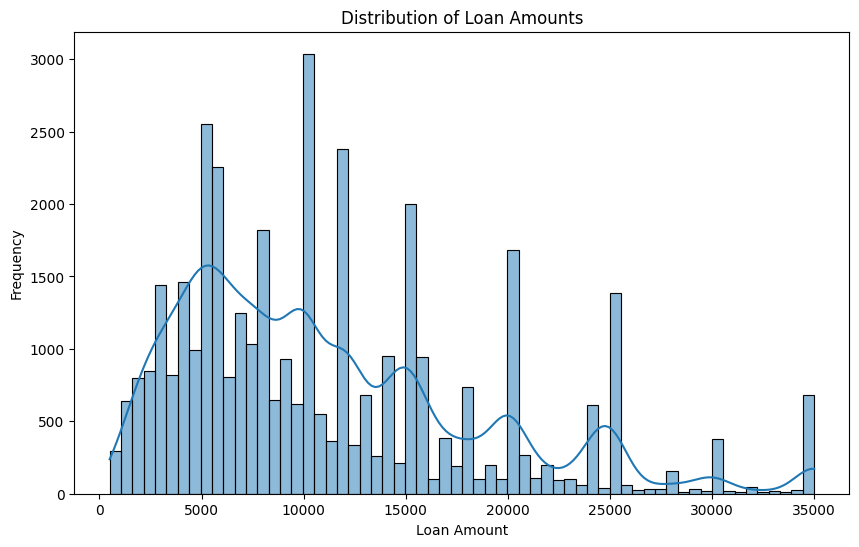

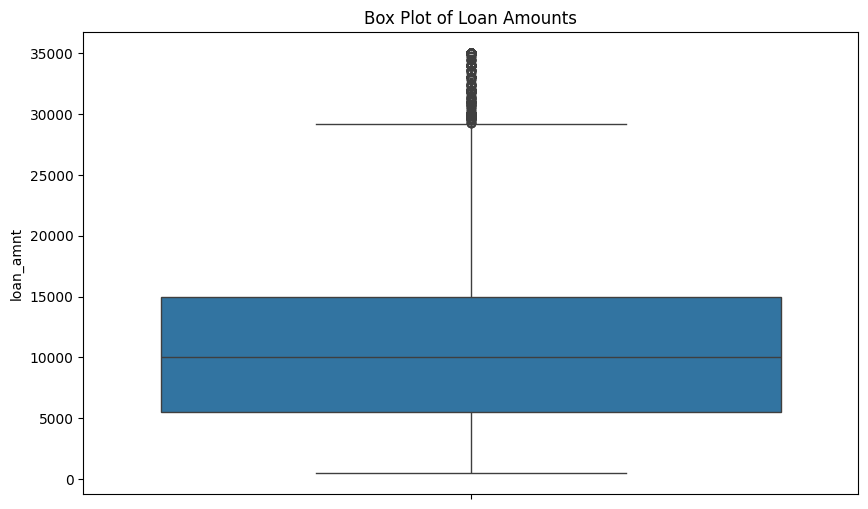

In [83]:
# Analysis for `loan amt'
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis for 'loan_amnt'
display(HTML(f"<h3>Analysis for loan_amnt</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'])
plt.title('Box Plot of Loan Amounts')
plt.show()

# Separator
display(HTML("<hr>"))


In [84]:
"""
Summary Analysis of loan_amnt:

- The loan amounts range from $500 to $35,000, with a mean of approximately $11,248.
- The median loan amount is $10,000, indicating a balanced distribution around this value.
- The standard deviation of $7,470 suggests moderate variability in loan amounts.
- The interquartile range (IQR) is $9,500, showing a reasonable spread between the 25th and 75th percentiles.
- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.
- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of loan amounts.
"""


'\nSummary Analysis of loan_amnt:\n\n- The loan amounts range from $500 to $35,000, with a mean of approximately $11,248.\n- The median loan amount is $10,000, indicating a balanced distribution around this value.\n- The standard deviation of $7,470 suggests moderate variability in loan amounts.\n- The interquartile range (IQR) is $9,500, showing a reasonable spread between the 25th and 75th percentiles.\n- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.\n- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of loan amounts.\n'

count    38881.000000
mean         0.120438
std          0.037413
min          0.054200
25%          0.092500
50%          0.118600
75%          0.146100
max          0.245900
Name: int_rate, dtype: float64

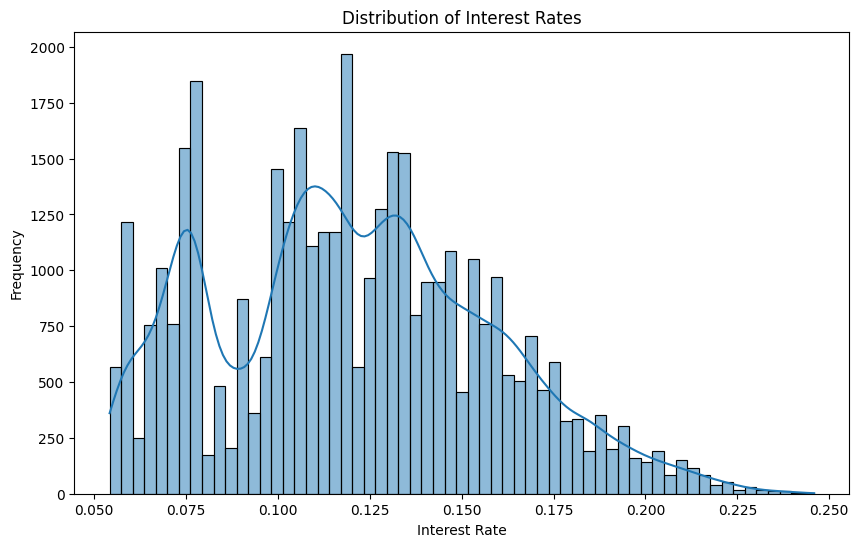

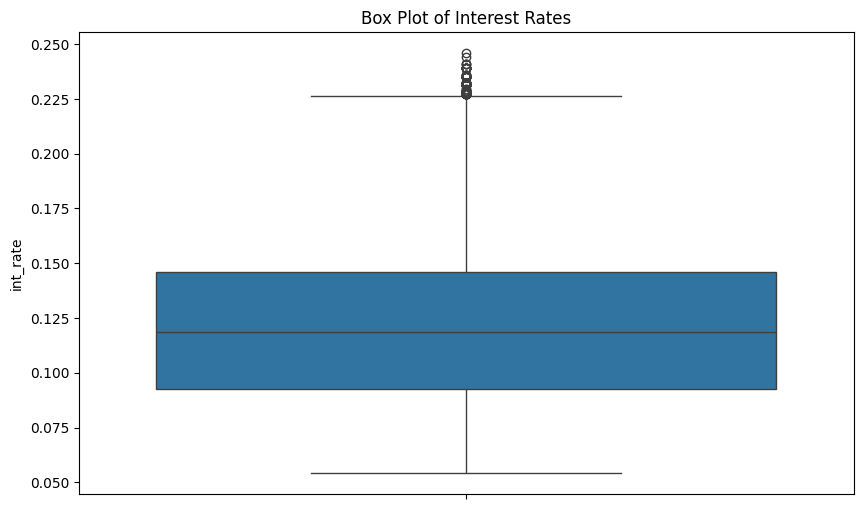

In [85]:
# Analysis for 'int_rate'
display(HTML(f"<h3>Analysis for int_rate</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'])
plt.title('Box Plot of Interest Rates')
plt.show()

# Separator
display(HTML("<hr>"))


In [86]:
"""
Summary Analysis of int_rate:

- The interest rates range from 5.42% to 24.59%, with a mean of approximately 12.04%.
- The median interest rate is 11.86%, indicating a slightly lower concentration of interest rates around this value.
- The standard deviation of 3.74% suggests a moderate variability in interest rates.
- The interquartile range (IQR) is 5.36%, with rates ranging from 9.25% (25th percentile) to 14.61% (75th percentile), showing a reasonable spread for loan interest rates.
- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.
- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of interest rates offered to borrowers.
"""


'\nSummary Analysis of int_rate:\n\n- The interest rates range from 5.42% to 24.59%, with a mean of approximately 12.04%.\n- The median interest rate is 11.86%, indicating a slightly lower concentration of interest rates around this value.\n- The standard deviation of 3.74% suggests a moderate variability in interest rates.\n- The interquartile range (IQR) is 5.36%, with rates ranging from 9.25% (25th percentile) to 14.61% (75th percentile), showing a reasonable spread for loan interest rates.\n- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.\n- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of interest rates offered to borrowers.\n'

count    38881.000000
mean     10973.825905
std       7197.851043
min        500.000000
25%       5425.000000
50%       9725.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

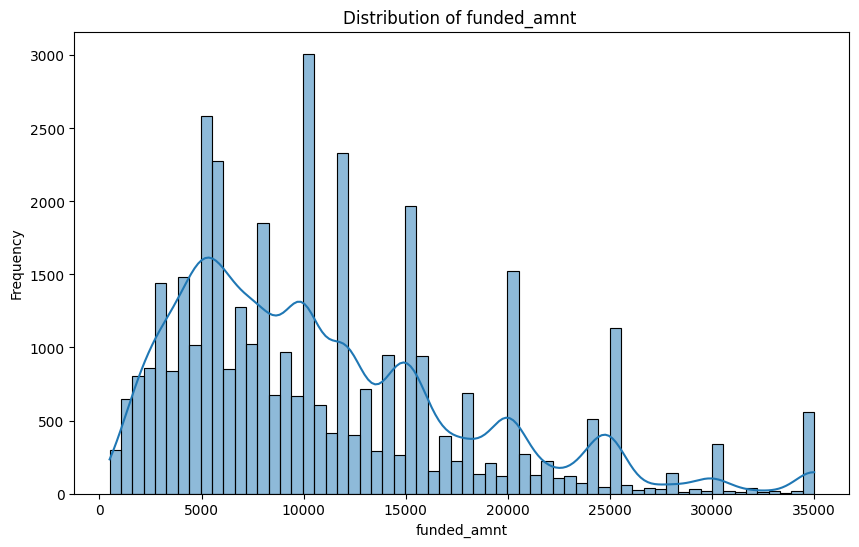

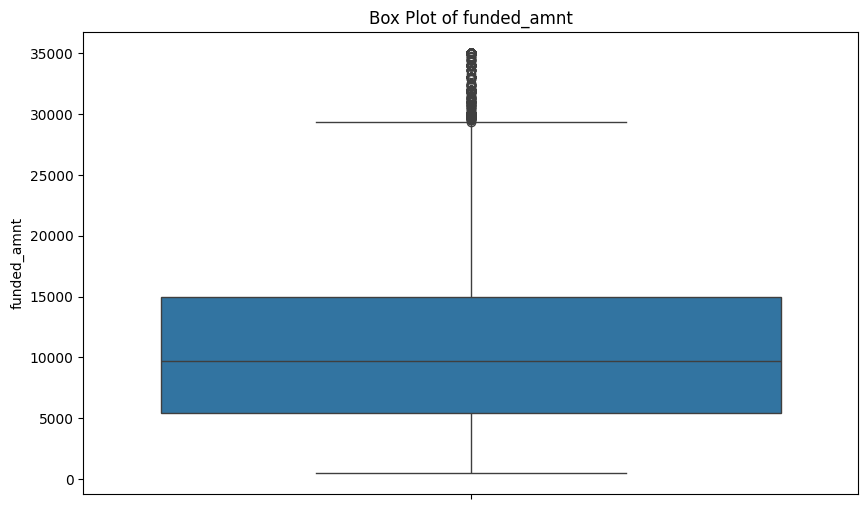

In [87]:
# Analysis for 'int_rate'
display(HTML(f"<h3>Analysis for funded_amnt</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'], kde=True)
plt.title('Distribution of funded_amnt ')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'])
plt.title('Box Plot of funded_amnt')
plt.show()

# Separator
display(HTML("<hr>"))


count    38881.000000
mean     10547.573491
std       7101.391677
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14479.387340
max      35000.000000
Name: funded_amnt_inv, dtype: float64

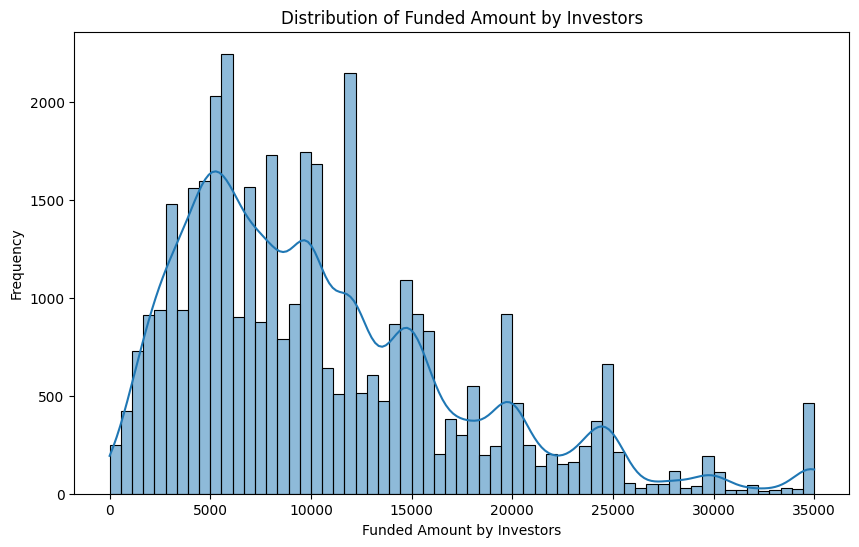

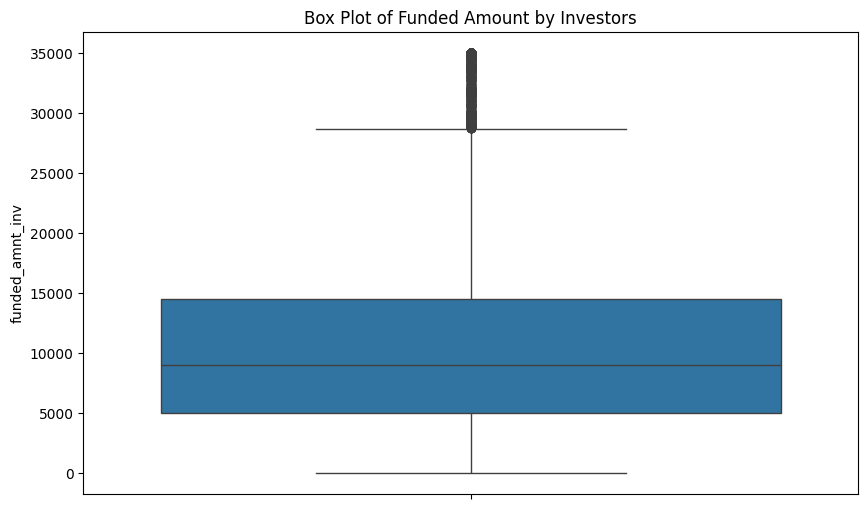

In [88]:
# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'], kde=True)
plt.title('Distribution of Funded Amount by Investors')
plt.xlabel('Funded Amount by Investors')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'])
plt.title('Box Plot of Funded Amount by Investors')
plt.show()

# Separator
display(HTML("<hr>"))

In [89]:
# same as loan_amt; outliers are not so far from IQR range
 

count    38881.000000
mean       324.789180
std        208.829963
min         16.080000
25%        167.340000
50%        280.390000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

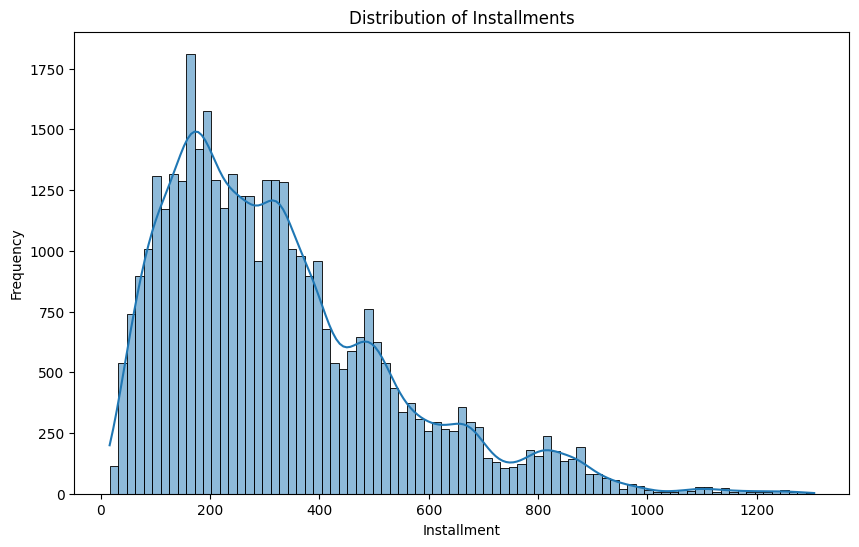

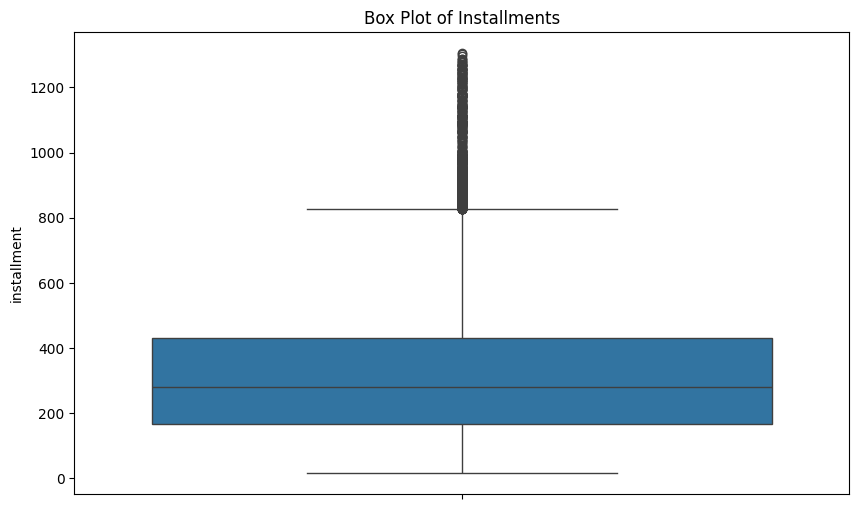

In [90]:

# Analysis for 'installment'
display(HTML(f"<h3>Analysis for installment</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'], kde=True)
plt.title('Distribution of Installments')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'])
plt.title('Box Plot of Installments')
plt.show()

# Separator
display(HTML("<hr>"))


In [91]:
#The installment is a derived metric based on the loan_amnt and int_rate, calculated using the loan's principal, 
#interest rate, and term. Given that we've already determined that there are no significant outliers in loan_amnt and int_rate,
# and that these variables are within expected ranges, the same reasoning applies to installment.
# We can also see this with the above histo and box plot.

count    3.888100e+04
mean     6.897030e+04
std      6.316489e+04
min      4.000000e+03
25%      4.080000e+04
50%      5.902051e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

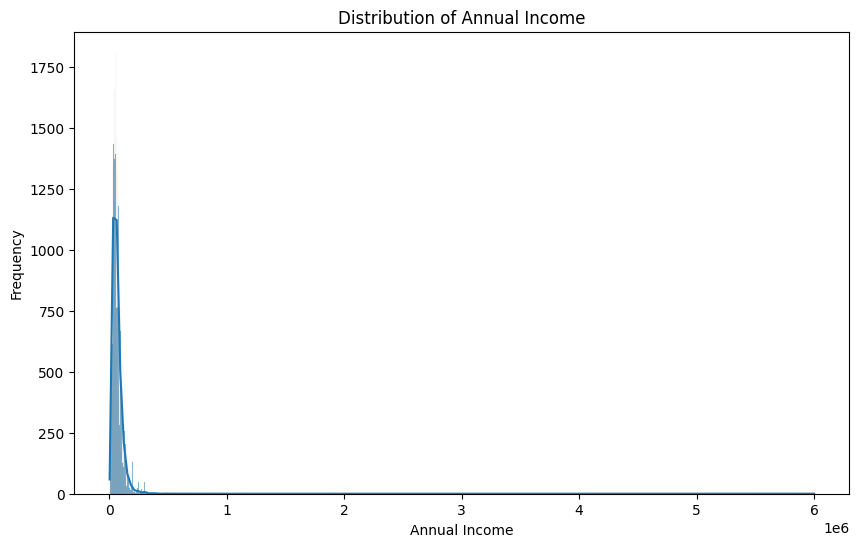

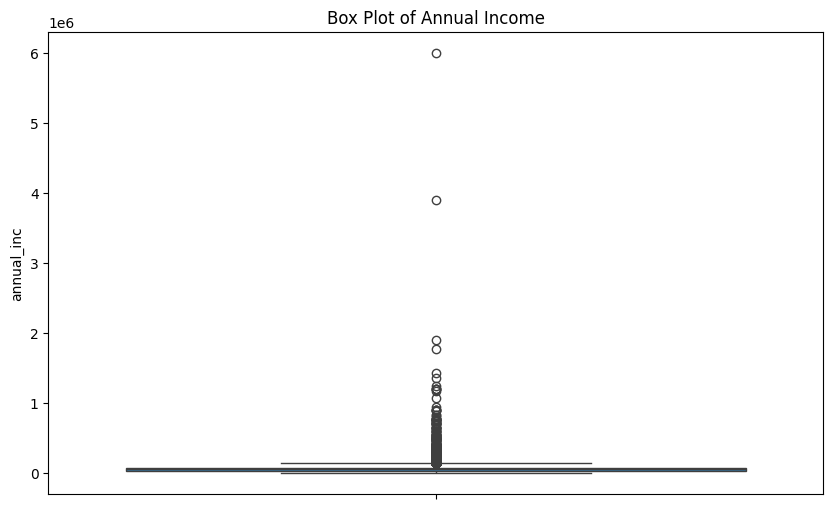

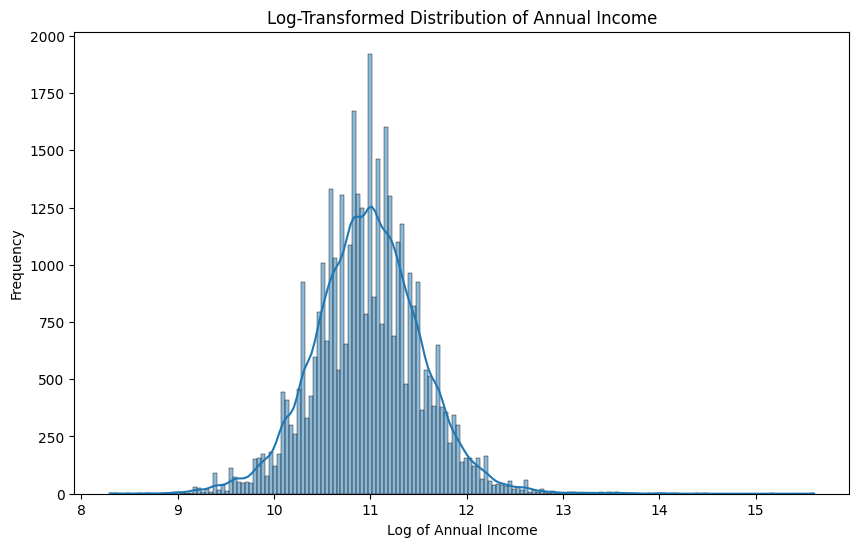

In [92]:


# Analysis for 'annual_inc'
display(HTML(f"<h3>Analysis for annual_inc</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.show()

# Log Transformation as distribution is highly skewed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc']), kde=True)
plt.title('Log-Transformed Distribution of Annual Income')
plt.xlabel('Log of Annual Income')
plt.ylabel('Frequency')
plt.show()

# Separator
display(HTML("<hr>"))


In [93]:
"""
Summary Analysis of annual_inc:

- The annual incomes range from $4,000 to $6,000,000, with a mean of approximately $68,970.
- The median income is $59,020, indicating a slight skew toward higher incomes.
- The standard deviation of $63,165 suggests significant variability in income levels.
- The distribution is right-skewed, with high-income outliers notably impacting the mean.
- Conclusion: While outliers exist, all data should be included in the analysis. Special handling, such as log transformation, may be needed in bivariate or multivariate analyses involving annual_inc.
"""

'\nSummary Analysis of annual_inc:\n\n- The annual incomes range from $4,000 to $6,000,000, with a mean of approximately $68,970.\n- The median income is $59,020, indicating a slight skew toward higher incomes.\n- The standard deviation of $63,165 suggests significant variability in income levels.\n- The distribution is right-skewed, with high-income outliers notably impacting the mean.\n- Conclusion: While outliers exist, all data should be included in the analysis. Special handling, such as log transformation, may be needed in bivariate or multivariate analyses involving annual_inc.\n'

count    38881.000000
mean        13.360985
std          6.666922
min          0.000000
25%          8.230000
50%         13.450000
75%         18.630000
max         29.990000
Name: dti, dtype: float64

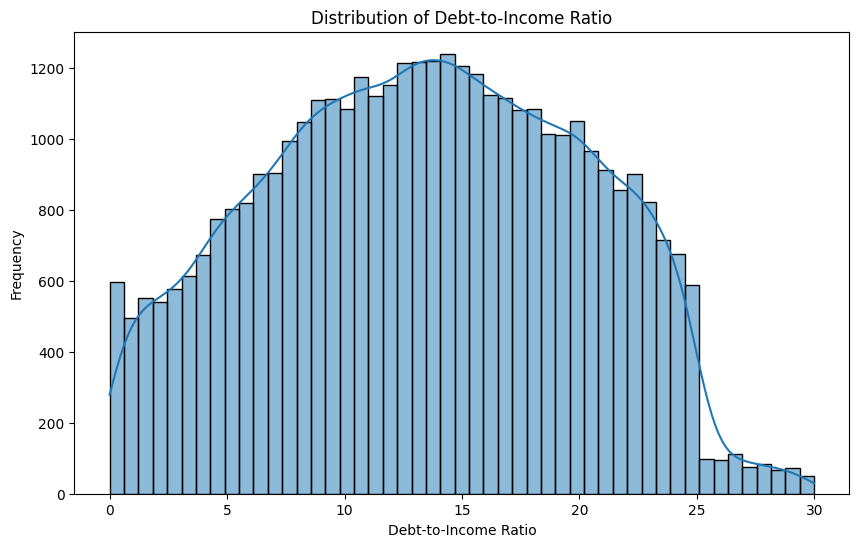

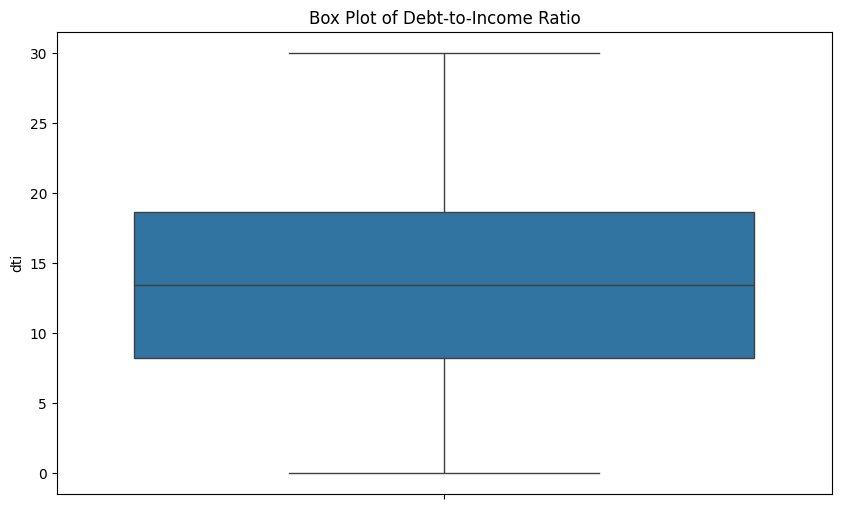

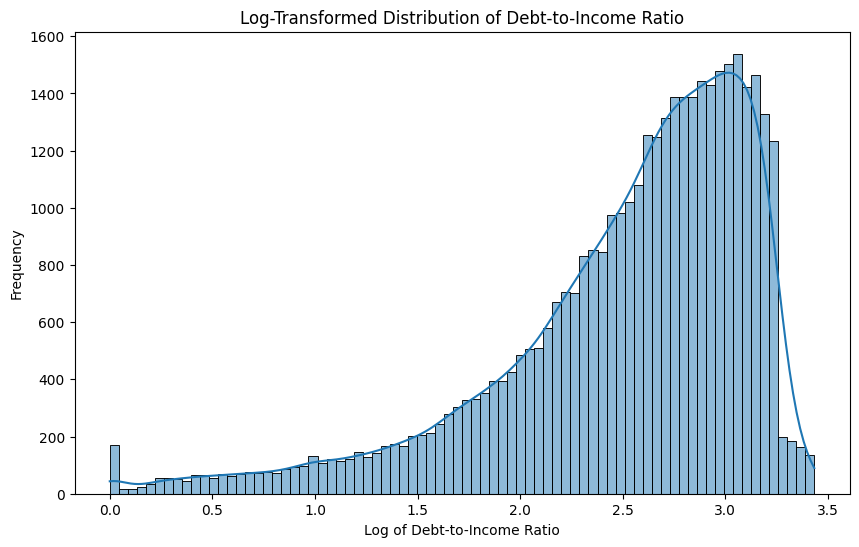

In [94]:


# Analysis for 'dti'
display(HTML(f"<h3>Analysis for dti</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'], kde=True)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'])
plt.title('Box Plot of Debt-to-Income Ratio')
plt.show()

# Optional: Log Transformation if distribution is highly skewed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti']), kde=True)
plt.title('Log-Transformed Distribution of Debt-to-Income Ratio')
plt.xlabel('Log of Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Separator
display(HTML("<hr>"))


In [95]:
"""
Summary Analysis of dti:

- The debt-to-income ratios range from 0% to 29.99%, with a mean of approximately 13.36%.
- The median DTI is 13.45%, indicating a balanced distribution around this value.
- The standard deviation of 6.67% suggests moderate variability in DTI among borrowers.
- The distribution is normal, with no extreme outliers, as the maximum value is within expected limits.
- Conclusion: All data should be included in the analysis as the distribution of DTI values is within the expected range and shows no significant outliers.
"""


'\nSummary Analysis of dti:\n\n- The debt-to-income ratios range from 0% to 29.99%, with a mean of approximately 13.36%.\n- The median DTI is 13.45%, indicating a balanced distribution around this value.\n- The standard deviation of 6.67% suggests moderate variability in DTI among borrowers.\n- The distribution is normal, with no extreme outliers, as the maximum value is within expected limits.\n- Conclusion: All data should be included in the analysis as the distribution of DTI values is within the expected range and shows no significant outliers.\n'

count    38881.000000
mean         0.145752
std          0.490418
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

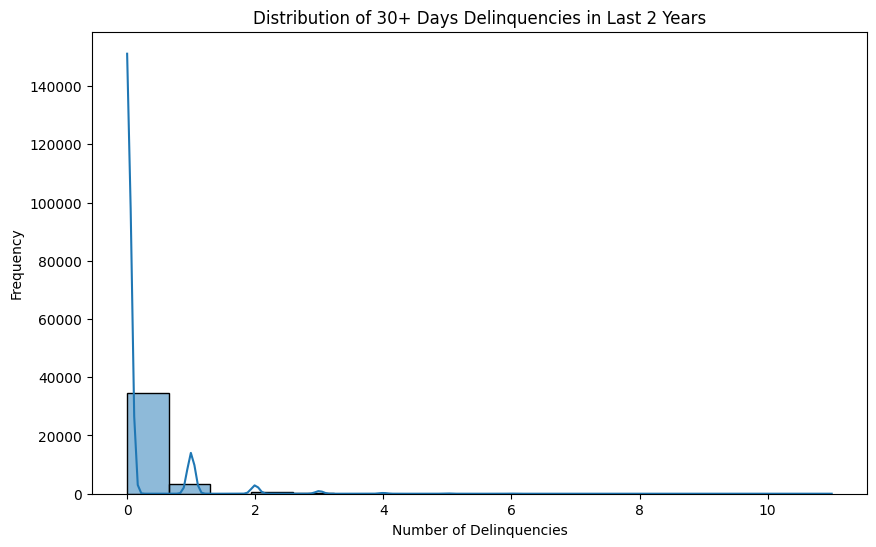

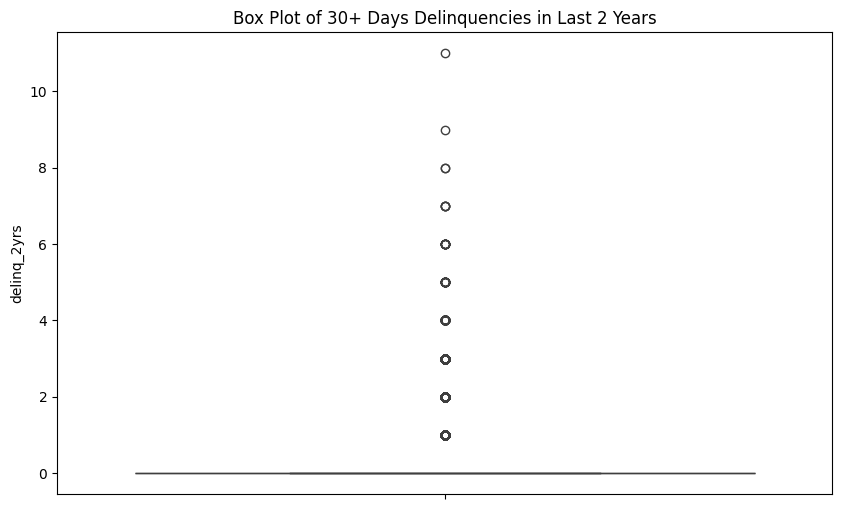

In [96]:


# Analysis for 'delinq_2yrs'
display(HTML(f"<h3>Analysis for delinq_2yrs</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'], kde=True)
plt.title('Distribution of 30+ Days Delinquencies in Last 2 Years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'])
plt.title('Box Plot of 30+ Days Delinquencies in Last 2 Years')
plt.show()

# Separator
display(HTML("<hr>"))


In [97]:
# The summary statistics for delinq_2yrs indicate that the majority of borrowers have had no 30+ days delinquencies in the past 
# 2 years. Given that the data is skewed but expected (many borrowers with no delinquencies), we should include all data in  analysis.
# when we move to bivariate analysis, particularly examining the relationship between delinq_2yrs and loan performance, we will consider the outliers more carefully.

count    38881.000000
mean         0.867159
std          1.067535
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

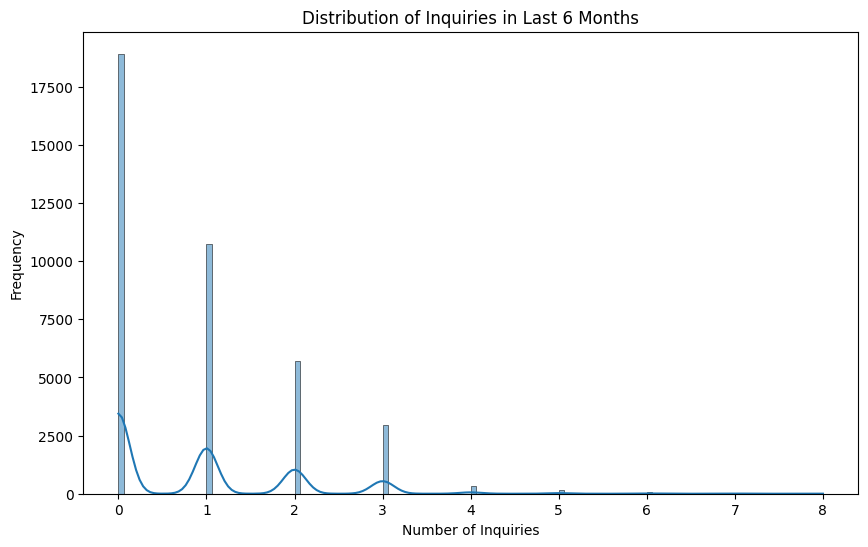

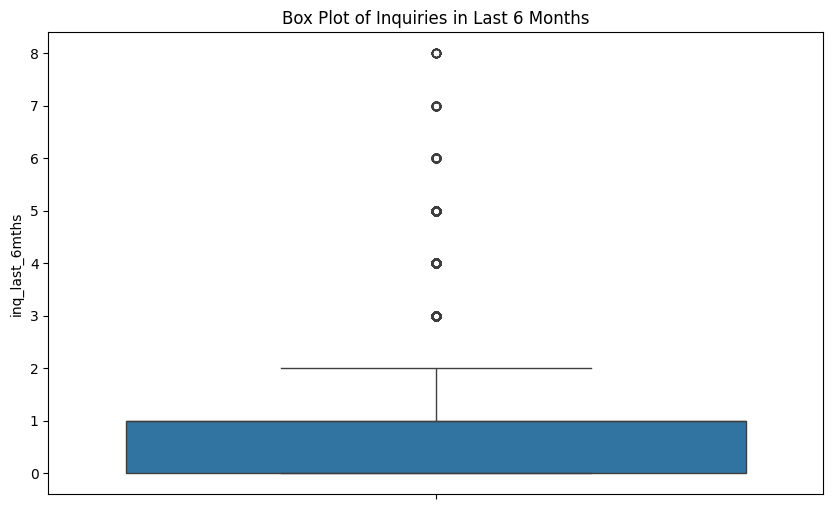

In [98]:


# Analysis for 'inq_last_6mths'
display(HTML(f"<h3>Analysis for inq_last_6mths</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'], kde=True)
plt.title('Distribution of Inquiries in Last 6 Months')
plt.xlabel('Number of Inquiries')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'])
plt.title('Box Plot of Inquiries in Last 6 Months')
plt.show()

# Separator
display(HTML("<hr>"))


In [99]:
"""
Summary Analysis of inq_last_6mths:

- The number of inquiries in the last 6 months ranges from 0 to 8, with a mean of approximately 0.87.
- The median number of inquiries is 1, indicating that most borrowers had one or fewer inquiries in the last 6 months.
- The standard deviation of 1.07 suggests that the number of inquiries varies, but most values are close to the mean.
- The 25th and 75th percentiles are both 0 and 1, respectively, showing that the majority of borrowers had either 0 or 1 inquiry.
- Conclusion: The distribution is right-skewed, with no extreme outliers. All data should be included in the analysis as it represents typical borrower behavior.
"""


'\nSummary Analysis of inq_last_6mths:\n\n- The number of inquiries in the last 6 months ranges from 0 to 8, with a mean of approximately 0.87.\n- The median number of inquiries is 1, indicating that most borrowers had one or fewer inquiries in the last 6 months.\n- The standard deviation of 1.07 suggests that the number of inquiries varies, but most values are close to the mean.\n- The 25th and 75th percentiles are both 0 and 1, respectively, showing that the majority of borrowers had either 0 or 1 inquiry.\n- Conclusion: The distribution is right-skewed, with no extreme outliers. All data should be included in the analysis as it represents typical borrower behavior.\n'

count    38881.000000
mean     65805.077750
std      47422.829019
min          0.000000
25%         51.000000
50%      99999.000000
75%      99999.000000
max      99999.000000
Name: mths_since_last_delinq, dtype: float64

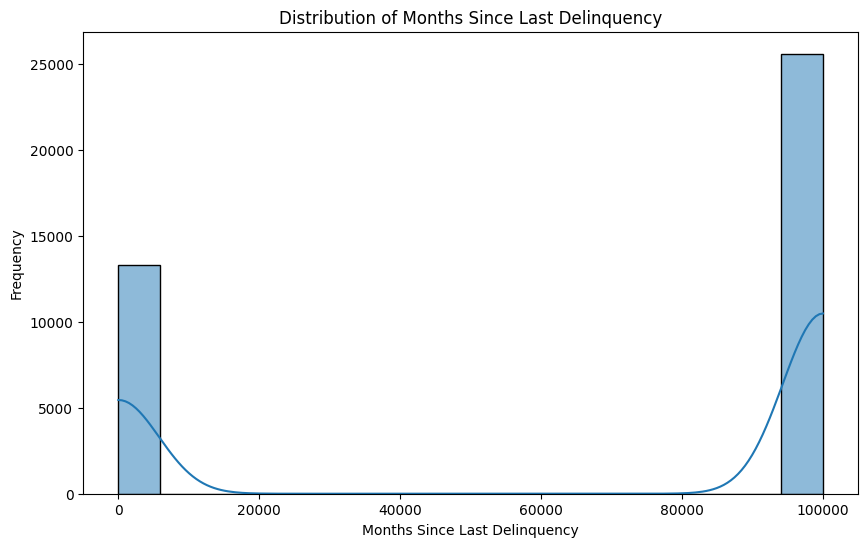

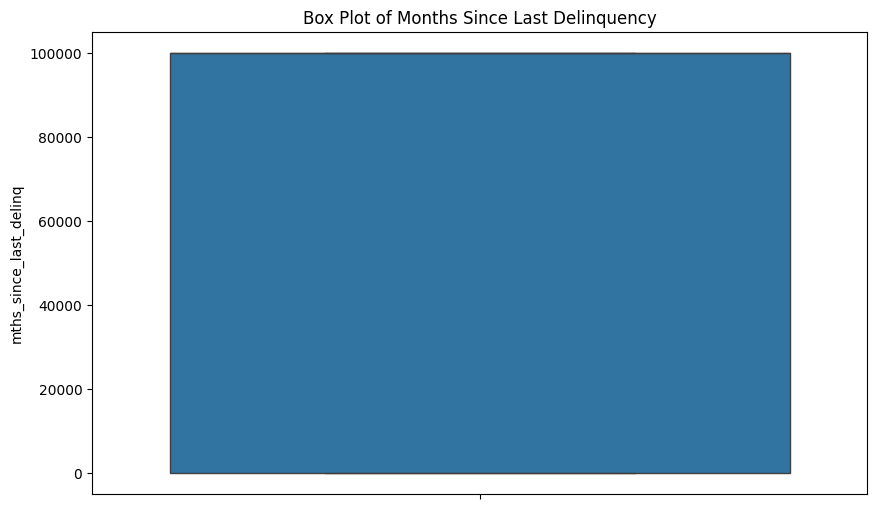

In [100]:


# Analysis for 'mths_since_last_delinq'
display(HTML(f"<h3>Analysis for mths_since_last_delinq</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'], kde=True)
plt.title('Distribution of Months Since Last Delinquency')
plt.xlabel('Months Since Last Delinquency')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'])
plt.title('Box Plot of Months Since Last Delinquency')
plt.show()

# Separator
display(HTML("<hr>"))


In [101]:
"""
Summary Analysis of mths_since_last_delinq:

- The number of months since the last delinquency has a mean of approximately 65,805 months, which is skewed by extreme values.
- The standard deviation is very high at 47,423 months, indicating significant variability in the data.
- The minimum value is 0 months, representing recent delinquencies.
- The 25th percentile is at 51 months, while the 50th and 75th percentiles are at 99,999 months, indicating that a large portion of the data uses 99,999 as a placeholder for missing values which we added previously.
"""

'\nSummary Analysis of mths_since_last_delinq:\n\n- The number of months since the last delinquency has a mean of approximately 65,805 months, which is skewed by extreme values.\n- The standard deviation is very high at 47,423 months, indicating significant variability in the data.\n- The minimum value is 0 months, representing recent delinquencies.\n- The 25th percentile is at 51 months, while the 50th and 75th percentiles are at 99,999 months, indicating that a large portion of the data uses 99,999 as a placeholder for missing values which we added previously.\n'

count    38881.000000
mean     94641.474808
std      22506.973188
min          6.000000
25%      99999.000000
50%      99999.000000
75%      99999.000000
max      99999.000000
Name: mths_since_last_record, dtype: float64

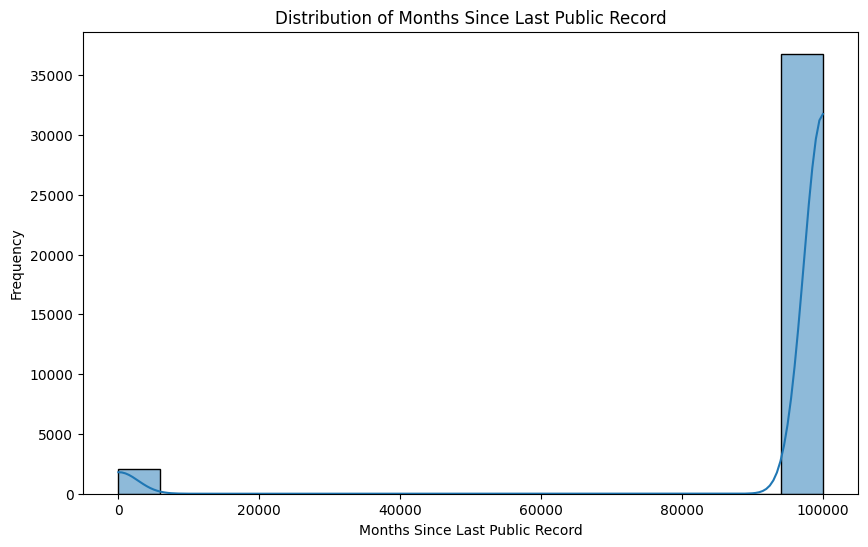

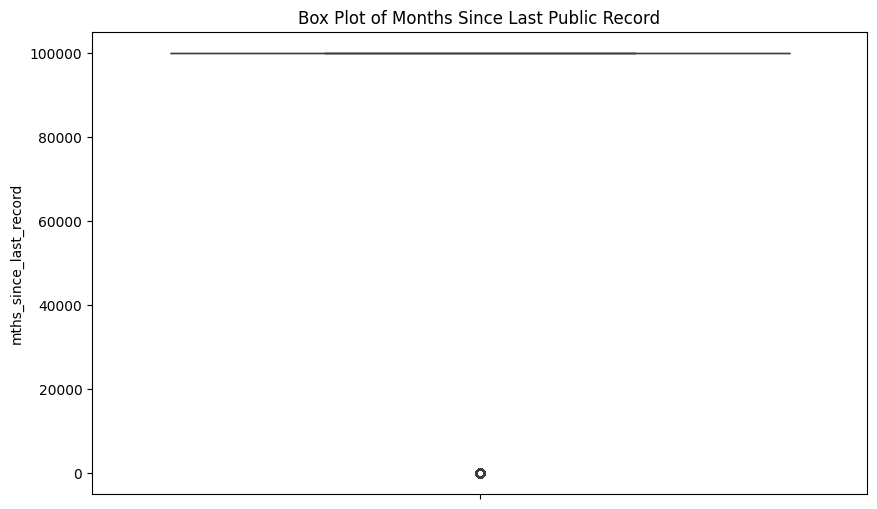

In [102]:


# Analysis for 'mths_since_last_record'
display(HTML(f"<h3>Analysis for mths_since_last_record</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'], kde=True)
plt.title('Distribution of Months Since Last Public Record')
plt.xlabel('Months Since Last Public Record')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'])
plt.title('Box Plot of Months Since Last Public Record')
plt.show()

# Separator
display(HTML("<hr>"))


In [103]:
"""
Summary Analysis of mths_since_last_record:

- The number of months since the last public record has a mean of approximately 94,641 months, which is heavily skewed by the placeholder value of 99,999.
- The standard deviation is 22,507 months, further indicating the impact of the placeholder values on the distribution.
- The minimum value is 6 months, indicating the most recent public record in the dataset.
- The 25th, 50th, 75th percentiles, and the maximum are all 99,999, suggesting that a large portion of the data uses 99,999 as a placeholder for cases where no public record data is available, which we did in previous step.
"""


'\nSummary Analysis of mths_since_last_record:\n\n- The number of months since the last public record has a mean of approximately 94,641 months, which is heavily skewed by the placeholder value of 99,999.\n- The standard deviation is 22,507 months, further indicating the impact of the placeholder values on the distribution.\n- The minimum value is 6 months, indicating the most recent public record in the dataset.\n- The 25th, 50th, 75th percentiles, and the maximum are all 99,999, suggesting that a large portion of the data uses 99,999 as a placeholder for cases where no public record data is available, which we did in previous step.\n'

count    38881.000000
mean         9.294360
std          4.379503
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

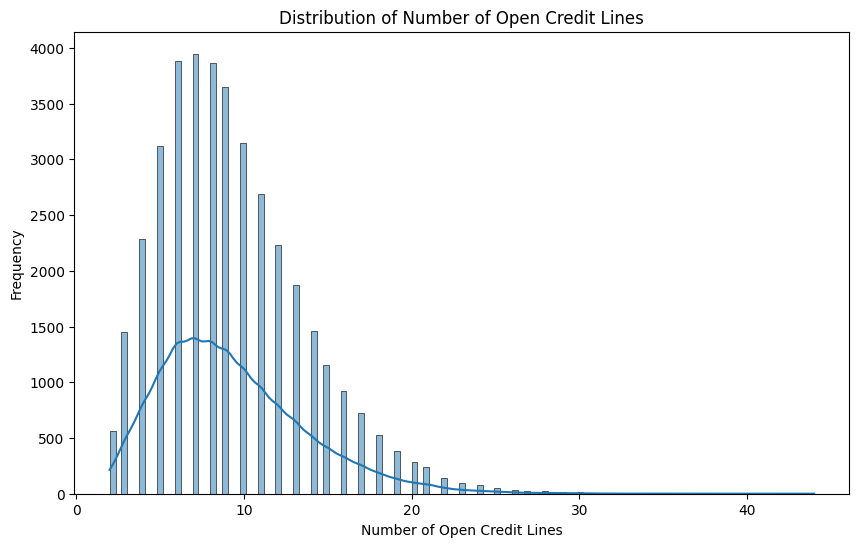

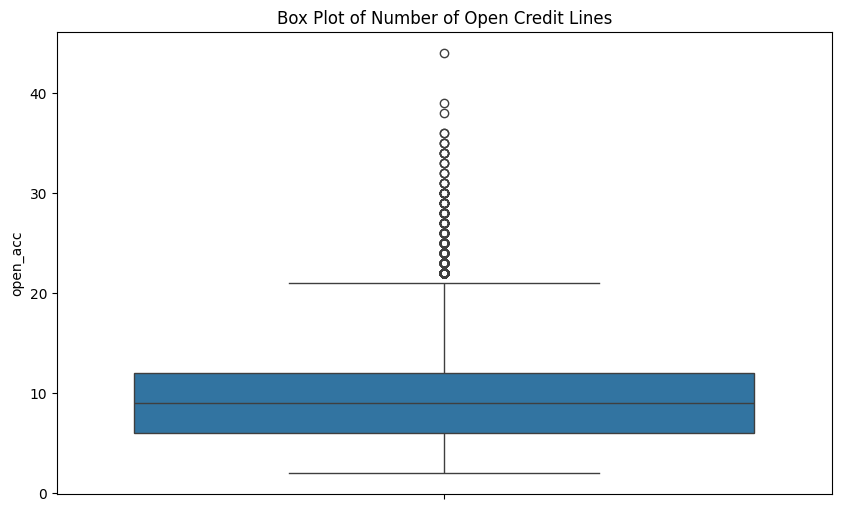

In [104]:


# Analysis for 'open_acc'
display(HTML(f"<h3>Analysis for open_acc</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'], kde=True)
plt.title('Distribution of Number of Open Credit Lines')
plt.xlabel('Number of Open Credit Lines')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'])
plt.title('Box Plot of Number of Open Credit Lines')
plt.show()

# Separator
display(HTML("<hr>"))


In [105]:
"""
Summary Analysis of open_acc:

- The number of open credit lines ranges from 2 to 44, with a mean of approximately 9.29.
- The median number of open accounts is 9, indicating a balanced distribution around this value.
- The standard deviation of 4.38 suggests moderate variability in the number of open credit lines among borrowers.
- The 25th percentile is at 6 open accounts, while the 75th percentile is at 12, showing a reasonable spread in the data.
- Conclusion: The distribution appears normal, with no extreme outliers. All data should be included in the analysis as it represents typical borrower credit profiles.
"""


'\nSummary Analysis of open_acc:\n\n- The number of open credit lines ranges from 2 to 44, with a mean of approximately 9.29.\n- The median number of open accounts is 9, indicating a balanced distribution around this value.\n- The standard deviation of 4.38 suggests moderate variability in the number of open credit lines among borrowers.\n- The 25th percentile is at 6 open accounts, while the 75th percentile is at 12, showing a reasonable spread in the data.\n- Conclusion: The distribution appears normal, with no extreme outliers. All data should be included in the analysis as it represents typical borrower credit profiles.\n'

count    38881.000000
mean         0.055400
std          0.237803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

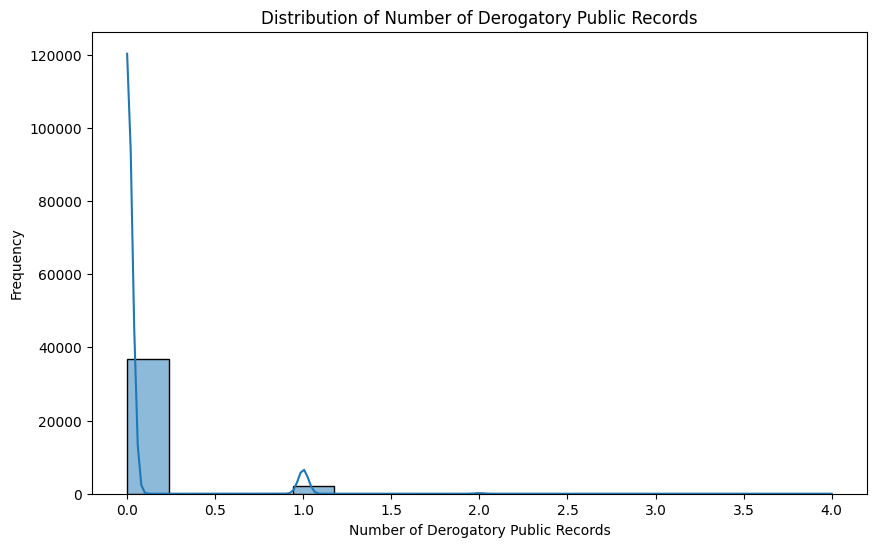

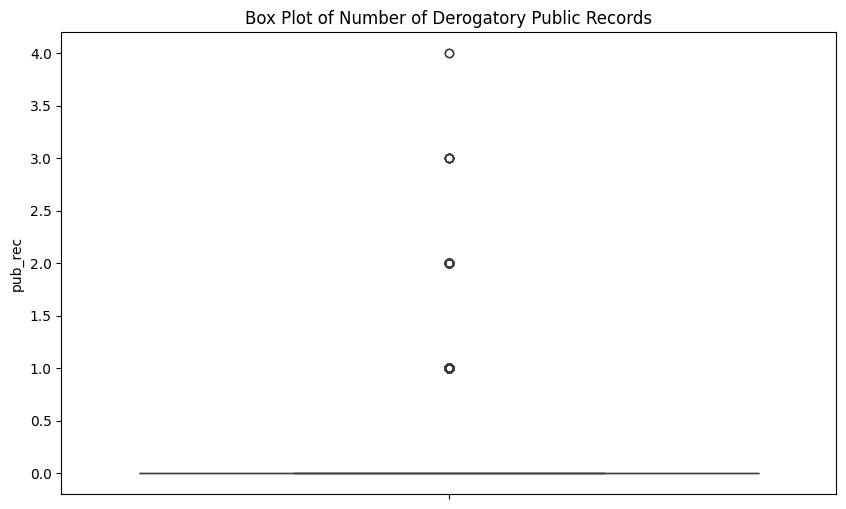

In [106]:


# Analysis for 'pub_rec'
display(HTML(f"<h3>Analysis for pub_rec</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'], kde=True)
plt.title('Distribution of Number of Derogatory Public Records')
plt.xlabel('Number of Derogatory Public Records')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'])
plt.title('Box Plot of Number of Derogatory Public Records')
plt.show()

# Separator
display(HTML("<hr>"))


In [107]:
"""
Summary Analysis of pub_rec:

- The number of derogatory public records ranges from 0 to 4, with a mean of approximately 0.055.
- The median value is 0, indicating that the majority of borrowers have no derogatory public records.
- The standard deviation of 0.238 suggests very low variability, with most values close to 0.
- The 25th, 50th, and 75th percentiles are all 0, showing that derogatory public records are rare in this dataset.
- Conclusion: The distribution is heavily skewed towards 0, with no extreme outliers. All data should be included in the analysis, as it accurately reflects the rarity of derogatory public records among borrowers.
"""


'\nSummary Analysis of pub_rec:\n\n- The number of derogatory public records ranges from 0 to 4, with a mean of approximately 0.055.\n- The median value is 0, indicating that the majority of borrowers have no derogatory public records.\n- The standard deviation of 0.238 suggests very low variability, with most values close to 0.\n- The 25th, 50th, and 75th percentiles are all 0, showing that derogatory public records are rare in this dataset.\n- Conclusion: The distribution is heavily skewed towards 0, with no extreme outliers. All data should be included in the analysis, as it accurately reflects the rarity of derogatory public records among borrowers.\n'

count     38881.000000
mean      13381.032175
std       15829.296861
min           0.000000
25%        3734.000000
50%        8868.000000
75%       17063.000000
max      149588.000000
Name: revol_bal, dtype: float64

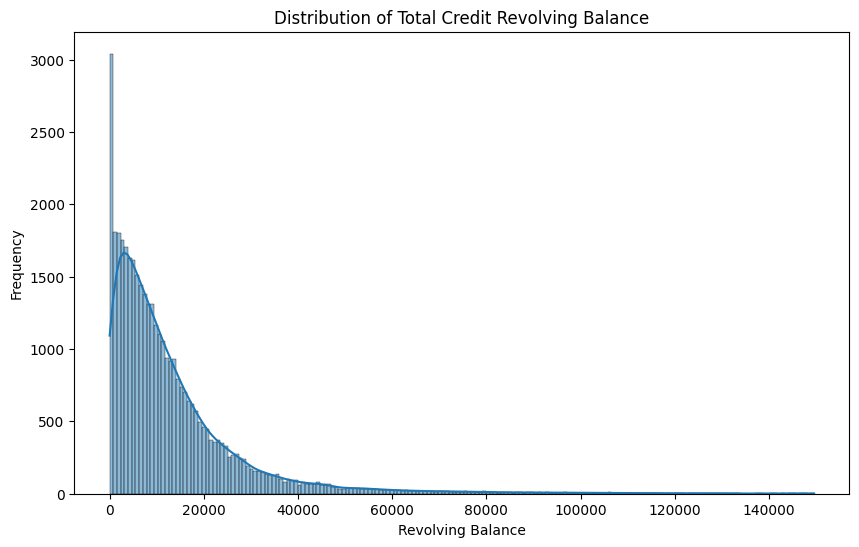

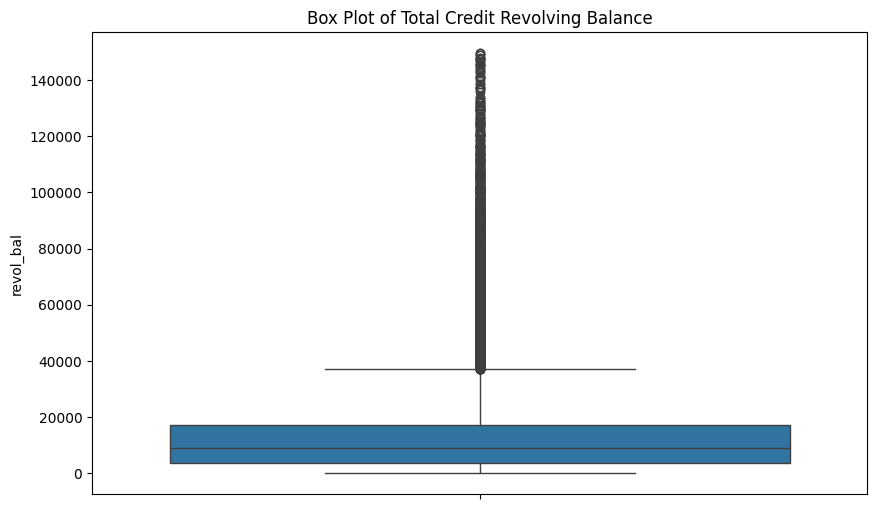

In [108]:
# Analysis for 'revol_bal'
display(HTML(f"<h3>Analysis for revol_bal</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'], kde=True)
plt.title('Distribution of Total Credit Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'])
plt.title('Box Plot of Total Credit Revolving Balance')
plt.show()

# Separator
display(HTML("<hr>"))


In [109]:
"""
Summary Analysis of revol_bal:

- The total credit revolving balance ranges from $0 to $149,588, with a mean of approximately $13,381.
- The median revolving balance is $8,868, indicating that half of the borrowers have a balance below this amount.
- The standard deviation of $15,829 suggests significant variability in revolving balances among borrowers.
- The 25th percentile is $3,734, while the 75th percentile is $17,063, showing a wide range in the distribution of revolving balances.
- Conclusion: The distribution shows a reasonable spread of revolving balances with no extreme outliers. All data should be included in the analysis as it reflects the typical distribution of credit revolving balances.
"""


'\nSummary Analysis of revol_bal:\n\n- The total credit revolving balance ranges from $0 to $149,588, with a mean of approximately $13,381.\n- The median revolving balance is $8,868, indicating that half of the borrowers have a balance below this amount.\n- The standard deviation of $15,829 suggests significant variability in revolving balances among borrowers.\n- The 25th percentile is $3,734, while the 75th percentile is $17,063, showing a wide range in the distribution of revolving balances.\n- Conclusion: The distribution shows a reasonable spread of revolving balances with no extreme outliers. All data should be included in the analysis as it reflects the typical distribution of credit revolving balances.\n'

count    38881.000000
mean         0.489760
std          0.283003
min          0.000000
25%          0.256000
50%          0.495000
75%          0.725000
max          0.999000
Name: revol_util, dtype: float64

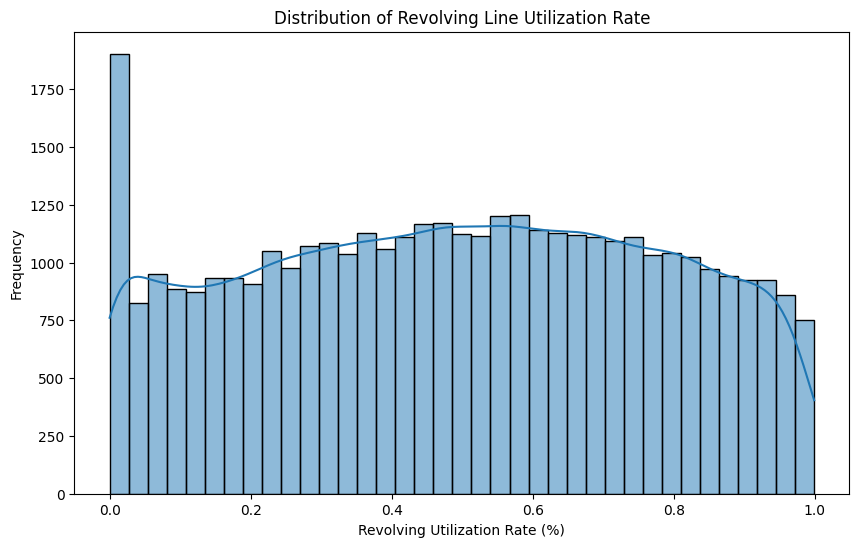

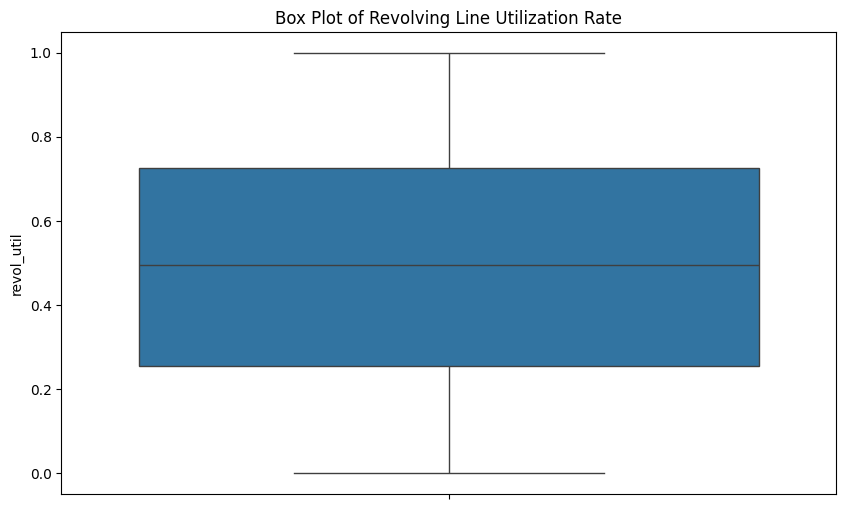

In [110]:


# Analysis for 'revol_util'
display(HTML(f"<h3>Analysis for revol_util</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'], kde=True)
plt.title('Distribution of Revolving Line Utilization Rate')
plt.xlabel('Revolving Utilization Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'])
plt.title('Box Plot of Revolving Line Utilization Rate')
plt.show()

# Separator
display(HTML("<hr>"))


In [111]:
"""
Summary Analysis of revol_util:

- The revolving line utilization rate ranges from 0% to 99.9%, with a mean of approximately 48.98%.
- The median utilization rate is 49.5%, indicating that half of the borrowers are using nearly half of their available revolving credit.
- The standard deviation of 28.30% suggests a wide variability in utilization rates among borrowers.
- The 25th percentile is at 25.6%, and the 75th percentile is at 72.5%, showing a significant spread in how borrowers use their revolving credit.
- Conclusion: The distribution shows a reasonable spread with no extreme outliers. All data should be included in the analysis as it reflects the typical usage of revolving credit by borrowers.
"""


'\nSummary Analysis of revol_util:\n\n- The revolving line utilization rate ranges from 0% to 99.9%, with a mean of approximately 48.98%.\n- The median utilization rate is 49.5%, indicating that half of the borrowers are using nearly half of their available revolving credit.\n- The standard deviation of 28.30% suggests a wide variability in utilization rates among borrowers.\n- The 25th percentile is at 25.6%, and the 75th percentile is at 72.5%, showing a significant spread in how borrowers use their revolving credit.\n- Conclusion: The distribution shows a reasonable spread with no extreme outliers. All data should be included in the analysis as it reflects the typical usage of revolving credit by borrowers.\n'

count    38881.000000
mean        22.141612
std         11.387959
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

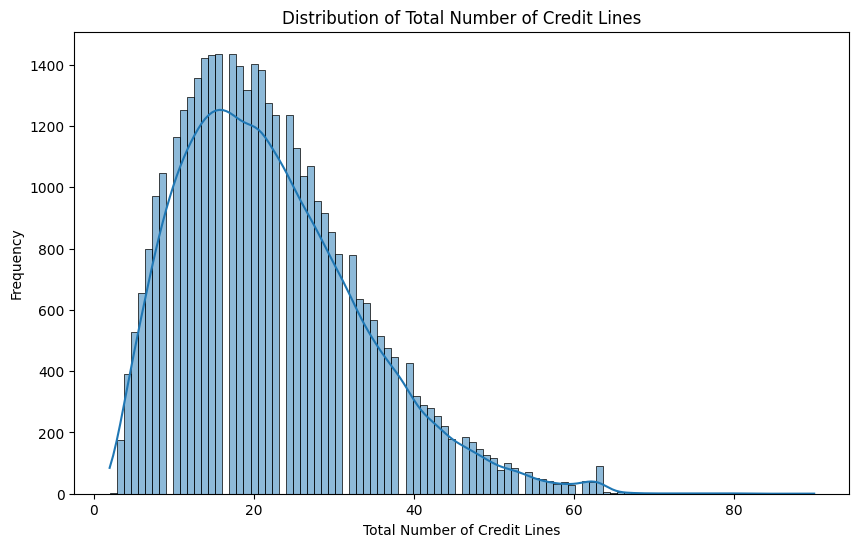

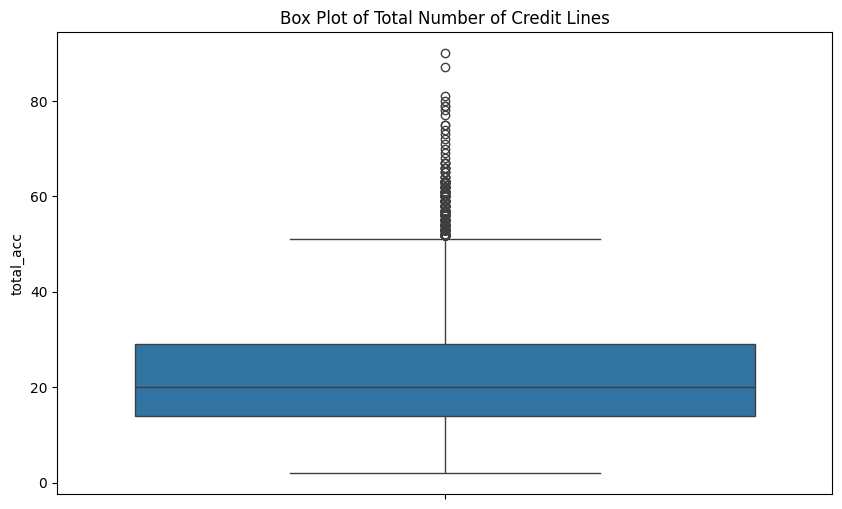

In [112]:


# Analysis for 'total_acc'
display(HTML(f"<h3>Analysis for total_acc</h3>"))

# Summary statistics
display(HTML(f"<h4>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'], kde=True)
plt.title('Distribution of Total Number of Credit Lines')
plt.xlabel('Total Number of Credit Lines')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'])
plt.title('Box Plot of Total Number of Credit Lines')
plt.show()

# Separator
display(HTML("<hr>"))


In [113]:
"""
Summary Analysis of total_acc:

- The total number of credit lines ranges from 2 to 90, with a mean of approximately 22.14.
- The median value is 20 credit lines, indicating a balanced distribution around this value.
- The standard deviation of 11.39 suggests significant variability in the total number of credit lines among borrowers.
- The 25th percentile is at 14 credit lines, and the 75th percentile is at 29 credit lines, showing a broad range in the data.
- Conclusion: The distribution shows a wide spread with no extreme outliers. All data should be included in the analysis as it reflects the typical number of credit lines in borrowers' credit files.
"""


"\nSummary Analysis of total_acc:\n\n- The total number of credit lines ranges from 2 to 90, with a mean of approximately 22.14.\n- The median value is 20 credit lines, indicating a balanced distribution around this value.\n- The standard deviation of 11.39 suggests significant variability in the total number of credit lines among borrowers.\n- The 25th percentile is at 14 credit lines, and the 75th percentile is at 29 credit lines, showing a broad range in the data.\n- Conclusion: The distribution shows a wide spread with no extreme outliers. All data should be included in the analysis as it reflects the typical number of credit lines in borrowers' credit files.\n"

In [114]:
"""
# Dependent Variables Skipped in Detailed Univariate Analysis

## Overview:
The following dependent variables are derived from other primary variables such as `loan_amnt`, `int_rate`, and `installment`. Since these primary variables have already been thoroughly analyzed and no significant outliers were found, the dependent variables are unlikely to exhibit outliers that aren't already accounted for. Therefore, detailed univariate analysis of these variables is skipped:

### Skipped Variables:
1. `out_prncp` - Remaining outstanding principal for the total amount funded.
2. `out_prncp_inv` - Remaining outstanding principal for the portion of the total amount funded by investors.
3. `total_pymnt` - Payments received to date for the total amount funded.
4. `total_pymnt_inv` - Payments received to date for the portion of the total amount funded by investors.
5. `total_rec_prncp` - Principal received to date.
6. `total_rec_int` - Interest received to date.
7. `total_rec_late_fee` - Late fees received to date.
8. `recoveries` - Post charge-off gross recovery (only for charged-off loans).
9. `collection_recovery_fee` - Post charge-off collection fee.
10. `last_pymnt_amnt` - Last total payment amount received.

## Rationale:
- These variables are dependent on the original loan terms and payment history, which have been analyzed through their primary variables.
- Any outliers or unusual distributions in these dependent variables would already be reflected in the primary variables.
- Skipping detailed univariate analysis for these variables allows for a more efficient focus on other critical aspects of the dataset.

## Conclusion:
The primary variables related to loan amounts, interest rates, and installments have been thoroughly analyzed and found to have no significant outliers. As a result, the dependent variables listed above are considered aligned with the primary data and do not require separate detailed analysis.
"""


"\n# Dependent Variables Skipped in Detailed Univariate Analysis\n\n## Overview:\nThe following dependent variables are derived from other primary variables such as `loan_amnt`, `int_rate`, and `installment`. Since these primary variables have already been thoroughly analyzed and no significant outliers were found, the dependent variables are unlikely to exhibit outliers that aren't already accounted for. Therefore, detailed univariate analysis of these variables is skipped:\n\n### Skipped Variables:\n1. `out_prncp` - Remaining outstanding principal for the total amount funded.\n2. `out_prncp_inv` - Remaining outstanding principal for the portion of the total amount funded by investors.\n3. `total_pymnt` - Payments received to date for the total amount funded.\n4. `total_pymnt_inv` - Payments received to date for the portion of the total amount funded by investors.\n5. `total_rec_prncp` - Principal received to date.\n6. `total_rec_int` - Interest received to date.\n7. `total_rec_late_f

##### 8.1.2. Ordered Categorical Variables
These categorical variables have a natural order or ranking.

- `term`: Number of payments on the loan (e.g., 36 months, 60 months).
   - Encoded as an integer type to preserve the order in the analysis.
- `grade`: Loan grade (e.g., A, B, C, D, E, F, G).
  - Will be encoded as an ordered categorical variable.
- `sub_grade`: Loan sub-grade (e.g., A1, A2, B1, B2, etc.).
  - Will be encoded as an ordered categorical variable.
- `emp_length`: Length of employment (e.g., <1 year, 1-2 years, 10+ years).
  - Will be encoded as an ordered categorical variable.



In [115]:
# Define the correct order of categories for 'emp_length'
emp_length_order = ['<1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 
                    '8 years', '9 years', '10 years', '10+ years']

# Encode 'emp_length' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'], categories=emp_length_order, ordered=True)

# Display the DataFrame and the data type of 'emp_length'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'].dtype)

0        10+ years
1              NaN
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 38881, dtype: category
Categories (12, object): ['<1 year' < '1 year' < '2 years' < '3 years' ... '8 years' < '9 years' < '10 years' < '10+ years']
category


In [117]:
# Define the correct order for 'grade'
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Encode 'grade' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'], categories=grade_order, ordered=True)

# Display the DataFrame and the data type of 'grade'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'].dtype)


0        B
1        C
2        C
3        C
4        B
        ..
39562    C
39573    C
39623    D
39666    C
39680    D
Name: grade, Length: 38881, dtype: category
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']
category


In [118]:
# Define the correct order for 'sub_grade'
sub_grade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'
]

# Encode 'sub_grade' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'], categories=sub_grade_order, ordered=True)

# Display the DataFrame and the data type of 'sub_grade'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'].dtype)

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39562    C1
39573    C2
39623    D3
39666    C4
39680    D1
Name: sub_grade, Length: 38881, dtype: category
Categories (35, object): ['A1' < 'A2' < 'A3' < 'A4' ... 'G2' < 'G3' < 'G4' < 'G5']
category


##### 8.1.3. Unordered Categorical Variables
These categorical variables do not have a natural order or ranking.

- `id`: Loan ID.
   - Converted to string data type.
- `member_id`: Member ID.
   - Converted to string data type.
- `emp_title`: Job title of the borrower.
   -Converted to string data type.
- `home_ownership`: Home ownership status (e.g., Rent, Own, Mortgage).
   - Converted to enum data type.
- `verification_status`: Income verification status (e.g., Verified, Not Verified).
   - Converted to enum data type.
- `loan_status`: Current status of the loan (e.g., Fully Paid, Charged Off, Current).
   - Converted to enum data type.
- `desc`: Loan description.
   - Converted to string data type.
- `purpose`: Purpose of the loan (e.g., Debt consolidation, Credit card).
   - Converted to string data type.
- `title`: Loan title.
   - Converted to string data type.
- `zip_code`: First 3 digits of the borrower's zip code.
   - Converted to string data type.
- `addr_state`: State of the address provided by the borrower.
   - Converted to string data type.
